## Skin Cancer MNIST HAM10000

In [19]:
#Import the necessary modules

import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
colors = sns.color_palette()

%matplotlib inline
plt.ion()   # interactive mode

import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
datadir = '/home/nishita/datasets/skin_mnist'

In [21]:
os.listdir(datadir) #list all files in dataset dir

['hmnist_8_8_L.csv',
 '.floydignore',
 'HAM10000_images_part_2',
 '.floyddata',
 'hmnist_8_8_RGB.csv',
 'HAM10000_metadata.csv',
 'floyd.yml',
 '.floydexpt',
 'HAM10000_images_part_1',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv']

In [22]:
# match imgae_id to path for all images in dataset
all_image_path = glob("/home/nishita/datasets/skin_mnist/*/*.jpg")
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}

# dict of lesion code to name
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

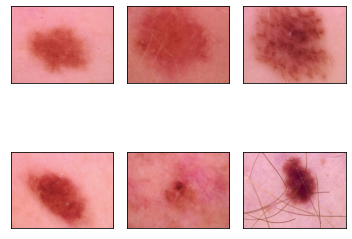

In [23]:
# visualize some sample images
w, h = 10, 10
fig = plt.figure(figsize=(5,5))
columns, rows = 3, 2
start, end = 0, len(imageid_path_dict)
ax = []
import random
for i in range(columns*rows):
    k = random.randint(start, end)
    img = mpimg.imread((all_image_path[k]))
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.tight_layout()
plt.show()  

In [24]:
# Checking the size and number of channels in the image
arr = np.asarray(Image.open(all_image_path[10]))
arr.shape

(450, 600, 3)

In [25]:
# exploring the HAM10000_metadata
df_original = pd.read_csv(os.path.join(datadir, 'HAM10000_metadata.csv')) #read csv file
df_original['path'] = df_original['image_id'].map(imageid_path_dict.get)   # map image_id to its path
df_original['cell_type'] = df_original['dx'].map(lesion_type_dict.get)     # map dx to lesion type
df_original['cell_type_idx'] = pd.Categorical(df_original['cell_type']).codes  # assign class codes for lesion types
df_original['cell_type_idx'].unique()

array([2, 4, 3, 6, 5, 1, 0], dtype=int8)

In [26]:
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2


In [27]:
print(f'Number of images: {len(df_original)}')

Number of images: 10015


In [28]:
# check class categories
df_original[['cell_type_idx', 'cell_type']].sort_values('cell_type_idx').drop_duplicates()

,cell_type_idx,cell_type
9804,0,Actinic keratoses
2528,1,Basal cell carcinoma
1018,2,Benign keratosis-like lesions
1159,3,Dermatofibroma
7050,4,Melanocytic nevi
2370,5,Vascular lesions
1577,6,dermatofibroma


`cell_type_idx` will be used for model training. We can check distribution of images over these classes.

In [29]:
df_original['cell_type'].value_counts()

Melanocytic nevi                  6705
dermatofibroma                    1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: cell_type, dtype: int64

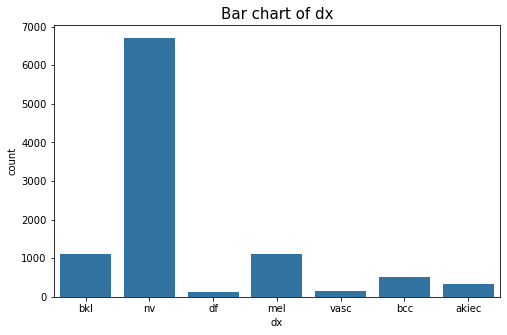

In [30]:
# Counts in each class
plt.figure(figsize=(8,5))
ax = sns.countplot(x='dx',data=df_original, color=colors[0])
plt.title('Bar chart of dx', fontdict={'size': 15})
plt.show()

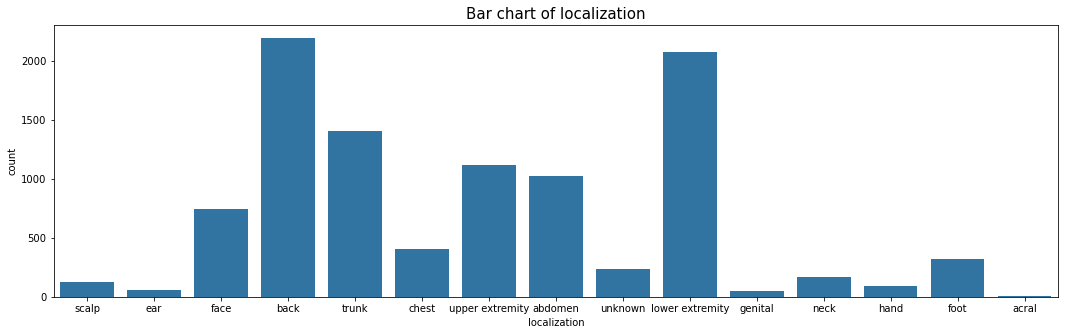

In [31]:
# Distribution of localization
plt.figure(figsize=(18,5))
ax = sns.countplot(x='localization',data=df_original, color=colors[0])
plt.title('Bar chart of localization', fontdict={'size': 15})
plt.show()

/home/nishita/anaconda3/envs/skin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


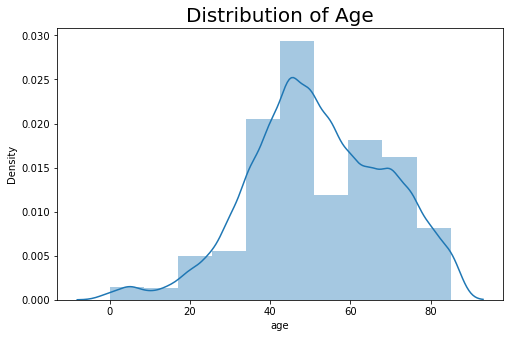

In [32]:
# Distribution of age
plt.figure(figsize=(8,5))
ax = sns.distplot(df_original['age'].dropna().values, 
                  bins=10, 
                  color=colors[0])
plt.title('Distribution of Age', fontdict={'size': 20})
plt.xlabel('age')
plt.show()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


NameError: name 'cv2' is not defined

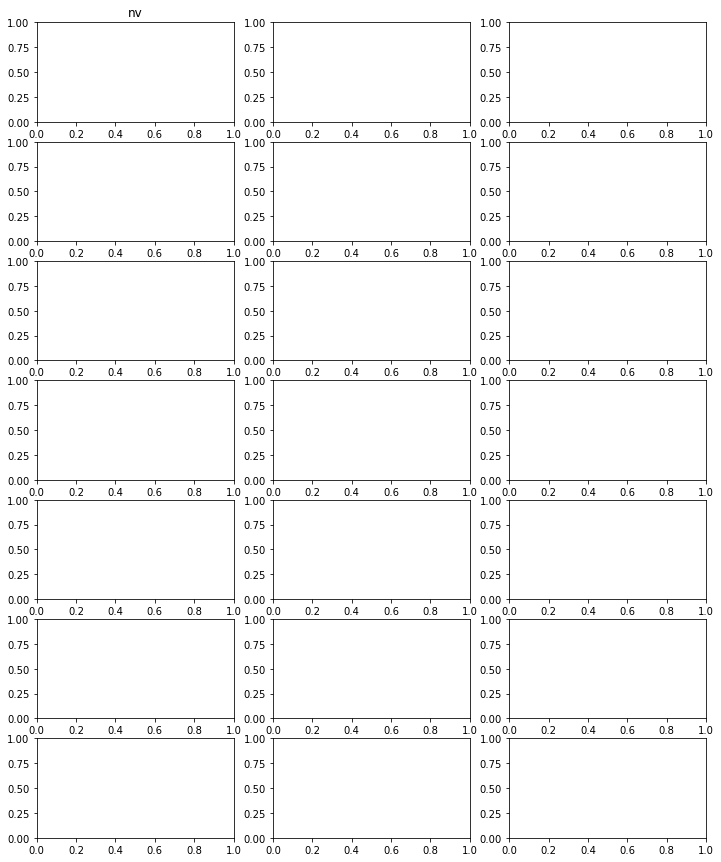

In [46]:
classes = df_original['dx'].value_counts()
print(classes)
n_samples = 3

# Visualizing images from each class
fig, ax = plt.subplots(len(classes), n_samples, figsize = (4*n_samples, 15))
for i in range(len(classes)):
    cls, sub_df = classes.index[i], df_original.loc[df_original['dx']==classes.index[i]]
    ax[i][0].set_title(cls)
    for j in range(n_samples):
        img = cv2.imread(sub_df['path'].iloc[j])
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        ax[i][j].imshow(img)
        ax[i][j].axis('off')

In [47]:
#Creating a new dataframe df_undup that contains only the non-duplicate elements.
df_undup = df_original.groupby('lesion_id').count()
df_undup.head()

,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates,train_or_val
lesion_id,,,,,,,,,,,
HAM_0000000,2,2,2,2,2,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1,1,1,1,1,1


Some lesion_id's have more than 1 image associated with them. Let's separate the unduplicated ids

In [48]:
df_undup = df_undup[df_undup['image_id'] == 1]
df_undup.reset_index(inplace=True)
df_undup.head()
len(df_undup)

5514

In [49]:
# Create new column specifying duplicated or not
def duplicated_or_not(x):
    unique_list = list(df_undup['lesion_id'])
    if x in unique_list:
        return 'unduplicated'
    else:
        return 'duplicated'
df_original['duplicates'] = df_original['lesion_id']
df_original['duplicates'] = df_original['duplicates'].apply(duplicated_or_not)
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates,train_or_val
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,ISIC_0027419
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,ISIC_0025030
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,ISIC_0026769
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,ISIC_0025661
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,ISIC_0031633


In [50]:
#creating the unduplicated dataframe
df_undup = df_original[df_original['duplicates'] == 'unduplicated']
df_undup.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates,train_or_val
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated,ISIC_0025276
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated,ISIC_0031326
20,HAM_0006071,ISIC_0032343,bkl,histo,70.0,female,face,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated,ISIC_0032343
33,HAM_0005612,ISIC_0024981,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated,ISIC_0024981
34,HAM_0005388,ISIC_0027815,bkl,histo,80.0,male,chest,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated,ISIC_0027815


In [51]:
len(df_undup) 

5514

In [53]:
df_original['duplicates'].value_counts()

unduplicated    5514
duplicated      4501
Name: duplicates, dtype: int64

We need to split the 10015 images into training and validation set. The training set can contain duplicated images but not the validation set. Hence, we choose validation images from the unduplicated ids and the rest can go to the training set.

In [54]:
#Create the validation dataframe
labels = df_undup['cell_type_idx']
#labels
_, df_temp = train_test_split(df_undup, test_size=0.3, random_state=42, stratify=labels)
df_temp.shape

(1655, 12)

In [55]:
# Assign val or train status to lesion_ids

def get_val_rows(x): 
    val_list = list(df_temp['image_id'])
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'


df_original['train_or_val'] = df_original['image_id']
df_original['train_or_val'] = df_original['train_or_val'].apply(get_val_rows)
# filter out train rows
df_train = df_original[df_original['train_or_val'] == 'train']
print(len(df_train))

8360


In [56]:
df_train.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates,train_or_val
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,train
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated,train


In [57]:
# Split the validation dataframe further to create test and val
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)
df_val.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates,train_or_val
3143,HAM_0003217,ISIC_0029888,nv,follow_up,65.0,female,lower extremity,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0029888
4169,HAM_0006860,ISIC_0032500,nv,follow_up,40.0,male,upper extremity,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0032500
4901,HAM_0005423,ISIC_0025503,nv,follow_up,40.0,male,trunk,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0025503
5981,HAM_0004313,ISIC_0026924,nv,follow_up,50.0,female,abdomen,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0026924
6251,HAM_0001802,ISIC_0030224,nv,follow_up,55.0,female,abdomen,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0030224


In [58]:
df_test.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates,train_or_val
6273,HAM_0000355,ISIC_0027842,nv,follow_up,30.0,male,abdomen,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0027842
3931,HAM_0004230,ISIC_0024585,nv,follow_up,45.0,female,back,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0024585
4946,HAM_0002586,ISIC_0025186,nv,follow_up,45.0,female,lower extremity,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0025186
6484,HAM_0000788,ISIC_0030301,nv,follow_up,35.0,female,trunk,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0030301
3463,HAM_0000729,ISIC_0030120,nv,follow_up,45.0,male,trunk,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated,ISIC_0030120


In [59]:
df_test = df_test.reset_index()
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index()

In [60]:
df_train.shape

(8360, 12)

In [61]:
df_val.shape

(827, 13)

In [62]:
df_test.shape

(828, 13)

We now have three dataframes for train, val and test each with a 70/15/15% split. Validation and test set only have unduplicated images, training set has duplicated images as well.

In [63]:
df_train['cell_type_idx'].value_counts()

4    5380
6    1044
2     967
1     461
0     282
5     123
3     103
Name: cell_type_idx, dtype: int64

In [64]:
df_val['cell_type'].value_counts()

Melanocytic nevi                  667
Benign keratosis-like lesions      63
dermatofibroma                     36
Basal cell carcinoma               29
Actinic keratoses                  17
Dermatofibroma                      8
Vascular lesions                    7
Name: cell_type, dtype: int64

In [65]:
df_test['cell_type'].value_counts()

Melanocytic nevi                  658
Benign keratosis-like lesions      69
dermatofibroma                     33
Actinic keratoses                  28
Basal cell carcinoma               24
Vascular lesions                   12
Dermatofibroma                      4
Name: cell_type, dtype: int64